### Load data from previous notebook

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
%matplotlib inline


def standardize(x):
    return (x - np.mean(x)) / np.std(x)


boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

# Minimizing the Cost Function

In [9]:
import numpy as np

x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])

In [10]:
def squared_cost(v, e):
    return np.sum((v - e)**2)

In [11]:
from scipy.optimize import fmin

xopt = fmin(squared_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [12]:
print('The result of optimization is {0}'.format(xopt[0]))
print('The mean is {0}'.format(np.mean(x)))

The result of optimization is 7.80000000000001
The mean is 7.8


In [13]:
def absolute_cost(v, e):
    return np.sum(np.abs(v - e))

xopt = fmin(absolute_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


In [14]:
print('The result of optimization is {0}'.format(xopt[0]))
print('The median is {0}'.format(np.median(x)))

The result of optimization is 8.000000000000009
The median is 8.0


# Pseudoinverse and Other Optimization Methods

In [18]:
observations = len(dataset)
X = dataset['RM'].values.reshape((observations, 1)) # X should always be a matrix, never a vector
Xb = np.column_stack((X, np.ones(observations))) # We add the bias
y = dataset['target'].values # y can be a vector

def matrix_inverse(X, y, pseudo=False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

def normal_equations(X, y):
    return np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

print(matrix_inverse(Xb, y))
print(matrix_inverse(Xb, y, pseudo=True))
print(normal_equations(Xb, y))

[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]


# Gradient Descent

Initialize vector w with random numbers taken from a standardized normal curve (0 mean and 0 variance).

Update the values of w until the cost, J(w), is small enough to let us know we have reached the optimum minimum.

Update the coefficients one-by-one by subtracting each from a portion alpha (learning rate) of the partial derivative of the cost function:
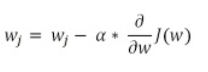

### Basic Implementation of Gradient Descent

In [20]:
observations = len(dataset)
X = dataset['RM'].values.reshape((observations, 1)) # X should always be a matrix
X = np.column_stack((X, np.ones(observations))) # Add the bias
y = dataset['target'].values # y is a vector

import random

def random_w(p):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X, w):
    return np.dot(X, w)

def loss(X, w, y):
    return hypothesis(X, w) - y

def squared_loss(X, w, y):
    return loss(X, w, y)**2

def gradient(X, w, y):
    gradients = list()
    n = float(len(y))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X, w, y) * X[:, j]) / n)
    return gradients

def update(X, w, y, alpha=0.01):
    return [t - alpha * g for t, g in zip(w, gradient(X, w, y))]

def optimize(X, y, alpha=0.01, eta=10**-12, iterations=1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X, w, y))
        new_w = update(X, w, y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X, new_w, y))
        w = new_w
        if k >= 5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path

In [21]:
alpha = 0.048
w, path = optimize(X, y, alpha, eta=10**-12, iterations=25000)
print('These are our final coefficients: {0}'.format(w))
print('Obtained walking on this path of squared loss {0}'.format(path))

These are our final coefficients: [9.1021032364625398, -34.670584233610896]
Obtained walking on this path of squared loss [361123.23183664575, 23868.501317764763, 22488.529217177176, 22162.636426081921, 22085.673919924993, 22067.498533675891, 22063.206253164251, 22062.192592615967, 22061.953207584083, 22061.896674661308, 22061.883323904447, 22061.880171003446, 22061.879426417592, 22061.87925057696, 22061.879209050621, 22061.879199243798, 22061.879196927832, 22061.879196380894, 22061.879196251735, 22061.879196221227, 22061.879196220129]
